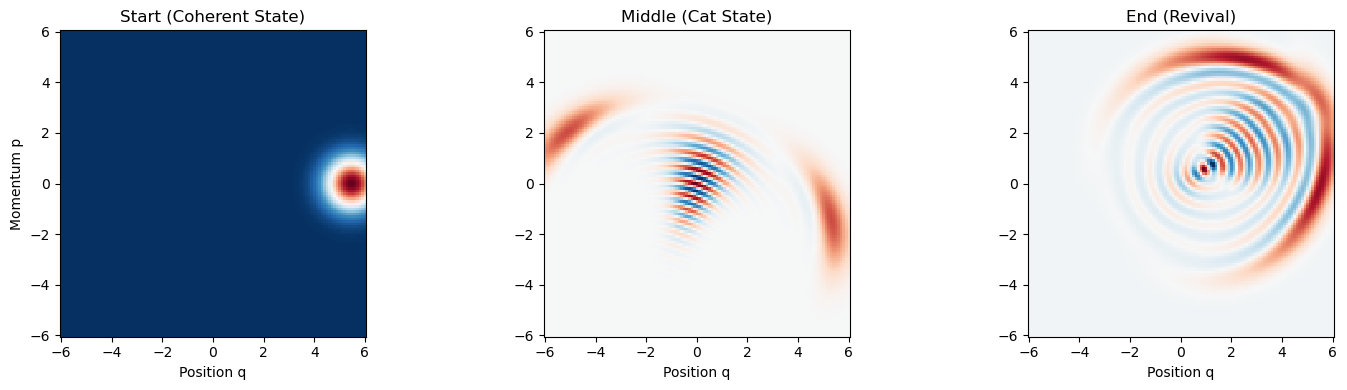

Running simulation... Done.


In [2]:
using QuantumOptics
using PyPlot

# --- PART 1: Run the Simulation (Generate psi_t) ---

# Parameters
N = 60           
ω = 1.0
g = 0.05
α = sqrt(15)     # Mean photon number = 15

# Build System
b_cav = FockBasis(N)
b_atom = SpinBasis(1//2)

a = destroy(b_cav) ⊗ one(b_atom)
sz = one(b_cav) ⊗ sigmaz(b_atom)
sm = one(b_cav) ⊗ sigmam(b_atom)

H = ω*a'*a + 0.5*ω*sz + g*(a'*sm + a*sm')

# Initial State: Coherent State |α> (x) Atom Excited
psi0 = coherentstate(b_cav, α) ⊗ spinup(b_atom)

# Time Evolution
print("Running simulation... ")
T = [0:0.5:600;]
tout, psi_t = timeevolution.schroedinger(T, psi0, H)
println("Done.")

# --- PART 2: Plot Wigner Functions (Use psi_t) ---

# Select indices for Start, Cat State (Middle), and Revival
indices = [1, 520, 1200]
titles = ["Start (Coherent State)", "Middle (Cat State)", "End (Revival)"]

# Grid for Wigner function
xvec = [-6:0.1:6;]
yvec = [-6:0.1:6;]

figure(figsize=(15, 4))

for i in 1:3
    # A. Get the state vector at this time
    idx = indices[i]
    state = psi_t[idx]
    
    # B. Trace out the Atom (Subsystem 2) to get Cavity Density Matrix
    rho_cavity = ptrace(state, 2)
    
    # C. Calculate Wigner Function
    W = wigner(rho_cavity, xvec, yvec)
    
    # D. Plotting
    subplot(1, 3, i)
    # transpose(W) is needed because PyPlot reads matrices differently than Julia
    pcolormesh(xvec, yvec, transpose(W), cmap="RdBu_r")
    
    title(titles[i])
    xlabel("Position q")
    if i == 1
        ylabel("Momentum p")
    end
    
    # Square aspect ratio
    gca().set_aspect("equal")
end

tight_layout()
display(gcf())